In [20]:
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from functions import load_and_merge_data, clean_data, calculate_stat_metrics, calculate_completion_rate, perform_chi2_test, calculate_time_spent, age_category,average_time_spent_by_step, time_correlation

# --- Load Data ---
df = load_and_merge_data('df_final_demo.txt', 'df_final_experiment_clients.txt', 'df_final_web_data_pt_1.txt', 'df_final_web_data_pt_2.txt')
warnings.simplefilter("ignore")
df.head()


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,visitor_id,visit_id,process_step,date_time
0,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45
1,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,start,2017-04-02 11:21:28
2,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,104438405_2368283624_817211,start,2017-03-29 11:02:44
3,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24
4,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,104438405_2368283624_817211,start,2017-03-29 11:01:40


In [21]:
df.shape

(449831, 14)

In [22]:
# --- Clean Data ---
df_final_filtered = clean_data(df)
df_final_filtered.shape

(321309, 14)

In [23]:
# --- Calculate Statistical Metrics (Client Age Example) ---
age_stats = calculate_stat_metrics(df_final_filtered, 'clnt_age')
print("Age Stats:", age_stats)

Age Stats: {'mean': 48.553511106959945, 'median': 50.0, 'mode': 58.5, 'variance': 244.78442943468343, 'std_dev': 15.64558817797156, 'min': 17.0, 'max': 96.0, 'range': 79.0, 'quartiles': 0.25    34.5
0.50    50.0
0.75    61.0
Name: clnt_age, dtype: float64, 'skewness': -0.012801806342837257, 'kurtosis': -0.9346229222661635}


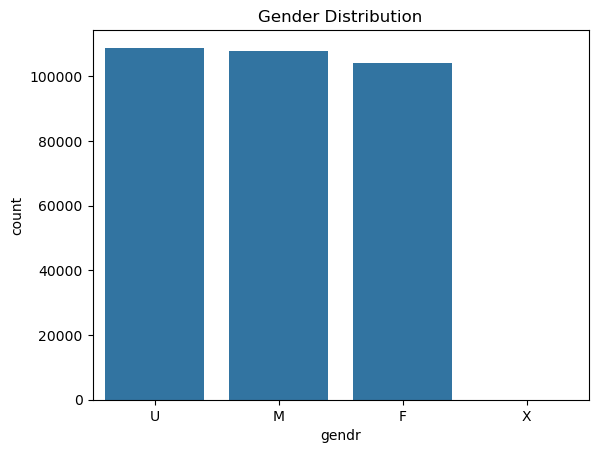

In [24]:
# --- Gender Distribution ---
sns.countplot(x='gendr', data=df_final_filtered)
plt.title('Gender Distribution')
plt.show()


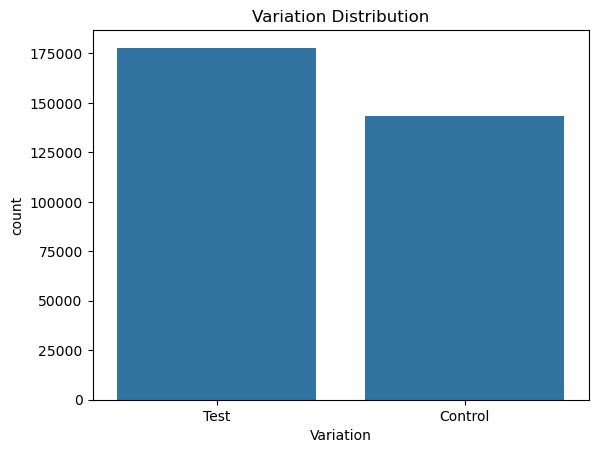

In [25]:
# --- Variation Distribution ---
sns.countplot(x='Variation', data=df)
plt.title('Variation Distribution')
plt.show()


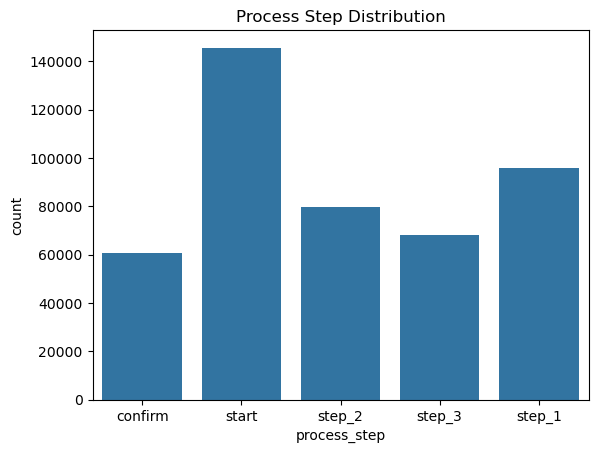

In [26]:
# --- Process Step Distribution ---
sns.countplot(x='process_step', data=df)
plt.title('Process Step Distribution')
plt.show()


In [27]:
# --- Process Step Completion Rate ---
steps = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
completion_rates = {'Control': [], 'Test': []}
for step in steps:
    rate = calculate_completion_rate(df_final_filtered, step)
    completion_rates['Control'].append(rate['Control'])
    completion_rates['Test'].append(rate['Test'])
    print(f'Completion rate for {step}:\n', rate)

df_completion_rate = pd.DataFrame(completion_rates, index=steps)

Completion rate for start:
 Variation
Control    0.331851
Test       0.317543
dtype: float64
Completion rate for step_1:
 Variation
Control    0.206800
Test       0.217985
dtype: float64
Completion rate for step_2:
 Variation
Control    0.180438
Test       0.174245
dtype: float64
Completion rate for step_3:
 Variation
Control    0.158892
Test       0.145597
dtype: float64
Completion rate for confirm:
 Variation
Control    0.122018
Test       0.144630
dtype: float64


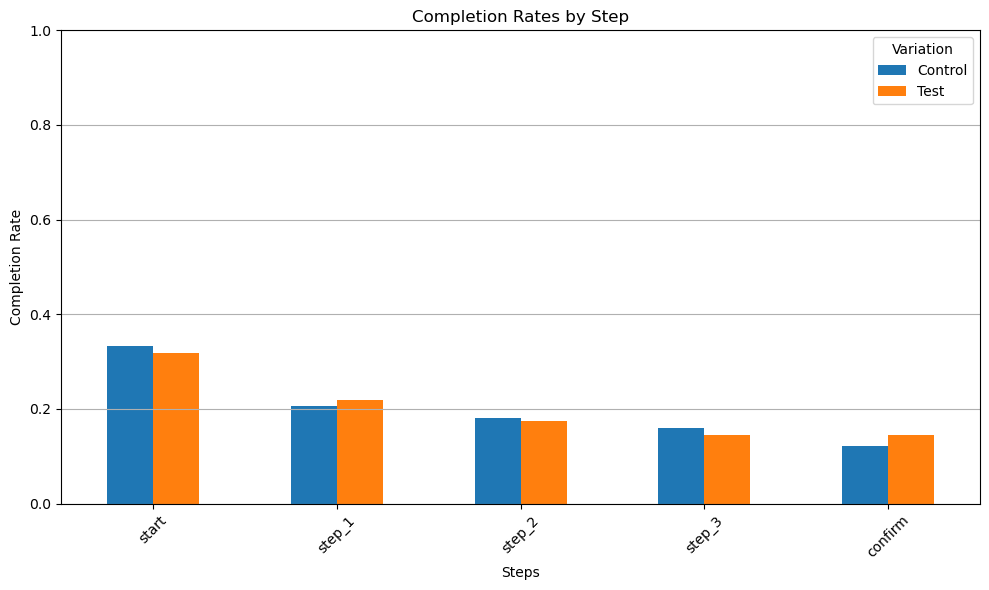

In [28]:
df_completion_rate.plot(kind='bar', figsize=(10, 6))

# Añadimos título y etiquetas
plt.title('Completion Rates by Step')
plt.xlabel('Steps')
plt.ylabel('Completion Rate')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Asumiendo que la tasa está en el rango [0, 1]
plt.legend(title='Variation')
plt.grid(axis='y')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [29]:
# --- Chi-square Test for Gender and Process Step ---
chi2, p, dof, cramer_v = perform_chi2_test(df_final_filtered, 'gendr', 'process_step')
print(f'Chi2: {chi2}, p-value: {p}, Degrees of Freedom: {dof}, Cramer\'s V: {cramer_v}')

Chi2: 129.14243570413805, p-value: 9.172804107886804e-22, Degrees of Freedom: 12, Cramer's V: 0.011576608824034098


In [30]:
# --- Calculate Time Spent ---
df_final_filtered = calculate_time_spent(df_final_filtered)
avg_time_spent = average_time_spent_by_step(df_final_filtered)
print(f'Average Time Spent on Steps:\n{avg_time_spent}')

Average Time Spent on Steps:
process_step       confirm          start      step_1     step_2      step_3
Variation                                                                   
Control       47187.336932  116308.852336  865.509168  39.387314  346.388594
Test          70075.646217   91382.160800  947.692556  83.501436  555.105314


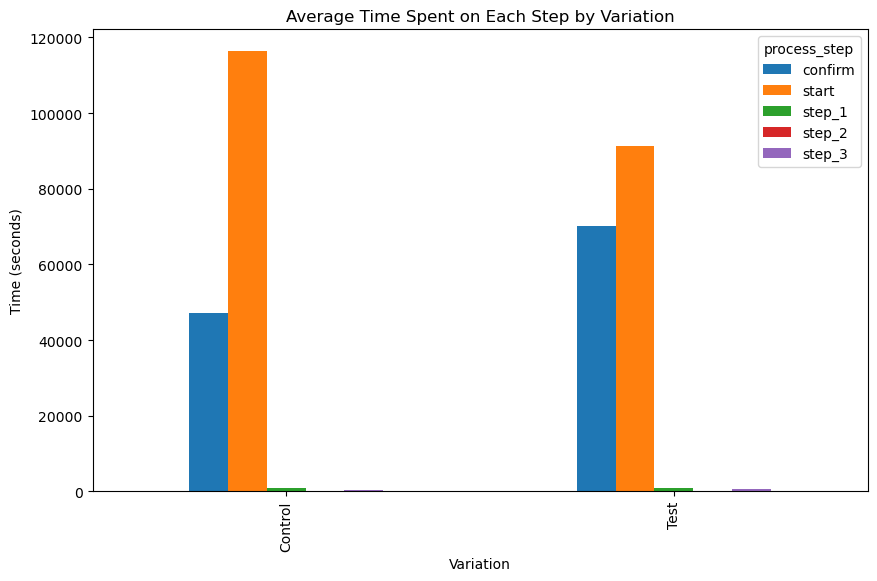

In [31]:
# --- Plot Average Time Spent ---
avg_time_spent.plot(kind='bar', figsize=(10,6))
plt.title('Average Time Spent on Each Step by Variation')
plt.ylabel('Time (seconds)')
plt.show()

In [32]:
# --- Correlation Analysis by Age Category ---
df_final_filtered = age_category(df_final_filtered)
age_corr = time_correlation(df_final_filtered, 'clnt_age_category')
print("Correlation by Age Category:\n", age_corr)

Correlation by Age Category:
       clnt_age_category    Variable  previous_time_spent
0          Young (0-30)  time_spent             0.004689
1  Young Adults (31-40)  time_spent             0.006686
2   Middle-aged (41-50)  time_spent             0.009725
3          Senior (51+)  time_spent             0.004486


In [33]:
# --- Correlation Analysis by Gender ---
gender_corr = time_correlation(df_final_filtered, 'gendr')
print("Correlation by Gender:\n", gender_corr)

Correlation by Gender:
   gendr    Variable  previous_time_spent
0     F  time_spent             0.008784
1     M  time_spent             0.009611
2     U  time_spent            -0.000664
3     X  time_spent            -0.426162
